In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import plotly.express as px
import plotly


import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 300)

%matplotlib inline

# 乱数seedの固定
np.random.seed(seed=123)

/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning:


The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.



In [2]:
df = pd.read_csv("../../data/data_covid_fix_name_code_coordinate_ltaly_medianage_hdi_density.csv")

In [3]:
df

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,...,cumul,air,code3,code2,lat,lon,dist_italy,median_age,HDI,population_density
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,...,108641,303.14,ALB,AL,41.327546,19.818698,6.134460e+05,36.200001,0.792,104.612263
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,...,80272,6442.44,DZA,DZ,36.753768,3.058756,9.934977e+05,27.500000,0.746,17.730075
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,...,303691,76.94,AGO,AO,-8.839988,13.289437,5.618975e+06,16.400000,0.582,24.713052
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,...,92122,1516.63,ARG,AR,-34.603684,-58.381559,1.113159e+07,30.799999,0.842,16.258510
4,Armenia,2951776,63.149,10343.175590,5.064044e+06,7.42,7.145017,7.70,62,60.8,...,86276,NaN,ARM,AM,40.179186,44.499103,2.682066e+06,33.900002,0.771,103.680225
5,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,...,1347,75667.65,AUS,AU,-35.308129,149.124402,1.621597e+07,37.400002,0.943,3.247871
6,Austria,8847037,58.297,55454.689293,7.103537e+06,8.48,9.245685,7.71,58,73.2,...,80272,12935.50,AUT,AT,48.208174,16.373819,7.641478e+05,43.200001,0.921,107.127967
7,Azerbaijan,9942334,55.680,18044.136784,4.849217e+06,6.22,6.104661,6.34,61,45.0,...,84456,2279.55,AZE,AZ,40.409262,49.867092,3.116272e+06,30.299999,0.754,120.234317
8,Bahamas,385640,83.025,32087.729155,1.327614e+07,7.56,7.871205,7.25,77,21.8,...,166430,1197.12,BHM,BS,25.047984,-77.355413,8.184770e+06,32.500000,0.812,38.525475
9,Bahrain,1569439,89.287,47303.048506,5.138295e+06,6.63,5.910895,7.35,56,45.8,...,78620,5877.00,BHR,BH,26.228516,50.586050,3.880128e+06,31.200001,0.852,2017.273700


# 人間開発指数  

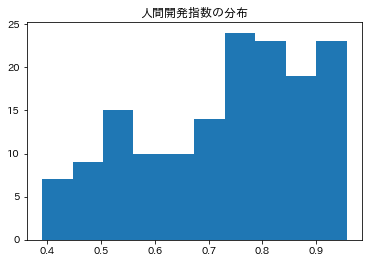

In [18]:
plt.title("人間開発指数の分布")
plt.hist(df["HDI"])
plt.savefig("../../plot/hdi_hist.png")

In [17]:
# 実測値の可視化
fig=px.choropleth(
    df,
    locations="code3",
    color="HDI",
    hover_name="country",
    #range_color=[0,102],
    #animation_frame='variable',
    #projection="natural earth",
    title="人間開発指数(HDI)",
    color_continuous_scale=list(px.colors.sequential.OrRd),
                                )
fig.show()

#plotly.offline.plot(fig, filename='output/実測値の可視化.png')

# 人口密度

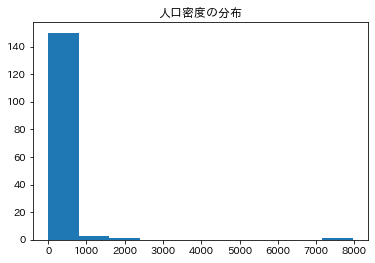

In [32]:
plt.title("人口密度の分布")
plt.hist(df["population_density"])
plt.savefig("../../plot/population_density_hist.png")

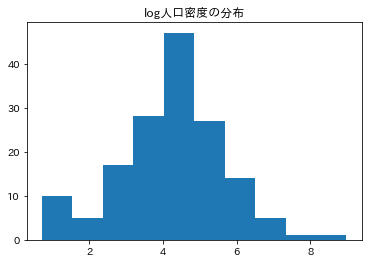

In [34]:
plt.title("log人口密度の分布")
plt.hist(np.log(df["population_density"]))
plt.savefig("../../plot/log_population_density_hist.png")

In [58]:
# 実測値の可視化
fig=px.choropleth(
    df,
    locations="code3",
    color="population_density",
    hover_name="country",
    #animation_frame='variable',
    #projection="natural earth",
    title="人口密度",
    #color_continuous_midpoint=100,
    color_continuous_scale=list(px.colors.sequential.OrRd),
                                )
fig.show()

#plotly.offline.plot(fig, filename='output/実測値の可視化.png')

In [54]:
df["log_population_density"] = np.log(df["population_density"])

# 実測値の可視化
fig=px.choropleth(
    df,
    locations="code3",
    color="log_population_density",
    hover_name="country",
    #animation_frame='variable',
    #projection="natural earth",
    title="log人口密度",
    color_continuous_scale=list(px.colors.sequential.OrRd),
                                )
fig.show()

#plotly.offline.plot(fig, filename='output/実測値の可視化.png')

In [20]:
df["population_density"].describe()

count     155.000000
mean      205.230020
std       676.035961
min         2.040609
25%        30.794627
50%        82.238615
75%       150.149658
max      7952.998418
Name: population_density, dtype: float64

In [21]:
df.sort_values("population_density")

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,...,cumul,air,code3,code2,lat,lon,dist_italy,median_age,HDI,population_density
94,Mongolia,3170208,68.445,13799.904847,1.141837e+06,7.61,7.788510,7.43,71,77.3,...,113067,670.36,MNG,MN,47.886399,106.905744,7.002383e+06,27.100000,0.735,2.040609
99,Namibia,2448255,50.032,11101.826282,1.115628e+07,6.75,6.971812,6.53,76,46.0,...,153747,602.89,NAM,NaN,-22.560881,17.065755,7.152277e+06,21.000000,0.645,2.973746
5,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,...,1347,75667.65,AUS,AU,-35.308129,149.124402,1.621597e+07,37.400002,0.943,3.247871
63,Iceland,353574,93.813,57303.060783,7.695516e+06,8.41,9.084634,7.74,61,37.2,...,84456,7819.74,ISL,IS,64.126521,-21.817439,3.301408e+06,36.000000,0.946,3.518414
134,Suriname,575991,66.060,15510.464636,1.503643e+07,7.48,8.300134,6.65,76,36.7,...,153747,272.35,SUR,SR,5.852036,-55.203828,7.737818e+06,28.400000,0.734,3.692250
82,Libya,6678567,80.102,20764.164136,7.927990e+06,4.64,4.833050,4.45,86,36.0,...,414875,927.15,LBY,LY,32.887209,13.191338,1.002479e+06,27.200001,0.721,3.795632
59,Guyana,779004,26.606,8640.737370,1.509226e+07,6.74,7.160822,6.32,74,20.3,...,132534,26.07,GUY,GY,6.801279,-58.155125,7.908884e+06,24.600000,0.680,3.957348
19,Botswana,2254126,69.446,18615.793336,1.061168e+07,7.17,6.970084,7.37,93,28.2,...,847716,253.42,BWA,BW,-24.628208,25.923147,7.494533e+06,24.400000,0.730,3.977425
27,Canada,37058856,81.411,48130.255973,8.965622e+06,8.65,9.222964,8.08,27,96.4,...,2020,89380.00,CAN,CA,45.421530,-75.697193,6.747132e+06,40.500000,0.928,4.075188
90,Mauritania,4403319,53.672,4150.965246,1.067772e+07,5.47,4.828573,6.11,76,39.5,...,153747,454.44,MRT,MR,18.073530,-15.958237,3.776073e+06,19.700001,0.542,4.272164


# 年齢中央値

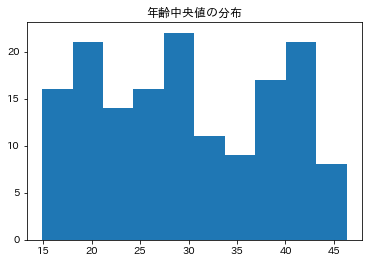

In [38]:
plt.title("年齢中央値の分布")
plt.hist(df["median_age"])
plt.savefig("../../plot/median_age_hist.png")

(array([ 5., 19., 12., 10., 15., 20., 16., 13., 26., 19.]),
 array([2.70136121, 2.81473929, 2.92811736, 3.04149543, 3.1548735 ,
        3.26825158, 3.38162965, 3.49500772, 3.60838579, 3.72176387,
        3.83514194]),
 <a list of 10 Patch objects>)

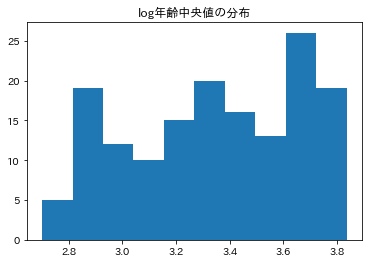

In [39]:
plt.title("log年齢中央値の分布")
plt.hist(np.log(df["median_age"]))
#plt.savefig("../../plot/median_age_hist.png")

In [40]:
# 実測値の可視化
fig=px.choropleth(
    df,
    locations="code3",
    color="median_age",
    hover_name="country",
    #animation_frame='variable',
    #projection="natural earth",
    title="年齢中央値",
    color_continuous_scale=list(px.colors.sequential.OrRd),
                                )
fig.show()

#plotly.offline.plot(fig, filename='output/実測値の可視化.png')

In [55]:
df.head(2)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,...,air,code3,code2,lat,lon,dist_italy,median_age,HDI,population_density,log_population_density
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,...,303.14,ALB,AL,41.327546,19.818698,613446.033335,36.200001,0.792,104.612263,4.650261
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,...,6442.44,DZA,DZ,36.753768,3.058756,993497.660060,27.500000,0.746,17.730075,2.875262


In [56]:
avg_lifeExp = (df['population_density']*df['pop']).sum()/df['pop'].sum()
avg_lifeExp

246.49411073279674